In [9]:
import numpy as np

import sys

sys.path.append('../scripts')

In [10]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from elements import *

import measurement as me

<IPython.core.display.Javascript object>


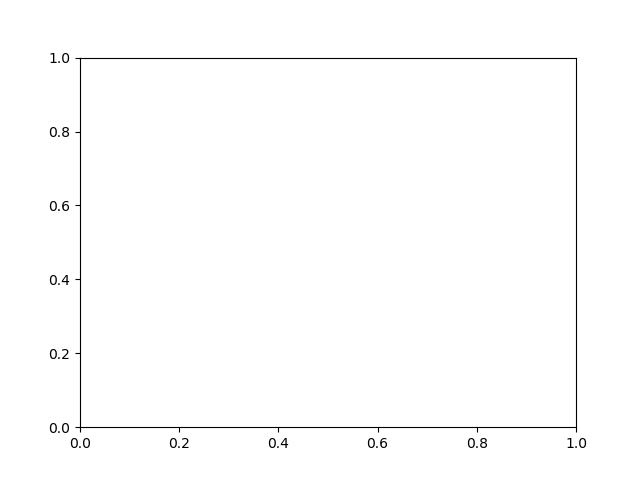

In [12]:
import matplotlib.pyplot as plt
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Define optomechanical system

In [13]:
omega_c = 5e9*np.pi*2

kappa_0 = 0.3e6*np.pi*2
kappa_ex = 0.4e6*np.pi*2

kappa = kappa_0 + kappa_ex

omega_m = 5e6*np.pi*2
gamma_m = 100*np.pi*2

P_in = 5e-9

g_0 = 200*np.pi*2

omega_drive = omega_c - 1 * omega_m


from DCnonlinearities import optomechanics

omdir = optomechanics(P_in, kappa_0, kappa_ex, omega_c, omega_drive, omega_m, g_0)

g= omdir['g']
omega_c = omdir['omega_c']



a = Mode('a', omega_c)
b = Mode('b', omega_m)

a_inex = Input('ex', a, kappa_ex, kind = 'drive', omega_drive = omega_drive, bath_temp=10e-3)
a_in0 = Input('0', a, kappa_0, kind = 'bath', bath_temp=10e-3)

b_in0 = Input('0', b, gamma_m, kind = 'bath', bath_temp=10e-3)

g_ab = Coupling(a, b, g * np.array([1,0,0,0]))

sys_om = System([a, b], [a_in0,b_in0 , a_inex], [g_ab])

C = 4 * g**2/kappa/gamma_m

print ('Cooperativity C: ',C)

Cooperativity C:  8973.133852515715


## Measurement 1: Mechanical Sidebands

<IPython.core.display.Javascript object>


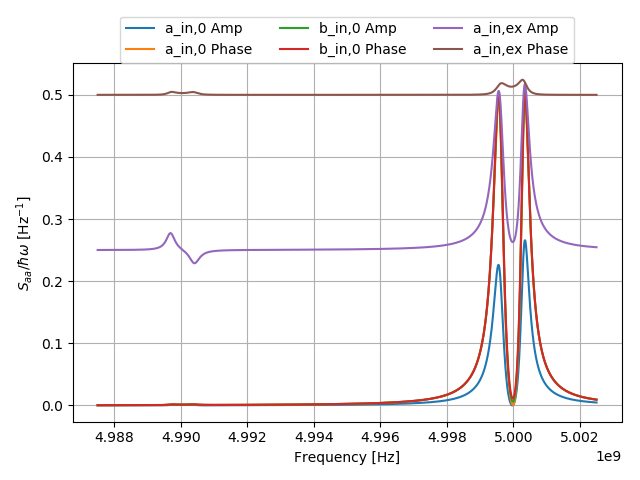

In [14]:
a_outex = Output(sys_om, a_inex)

omegas = np.linspace(omega_drive - 1.5*omega_m, omega_drive + 1.5*omega_m, 10001)

spec = me.spectrum(omegas,me.PowerMeasurement(a_outex), components = True, plot = True)

## Measurement 2: Red sideband

<IPython.core.display.Javascript object>


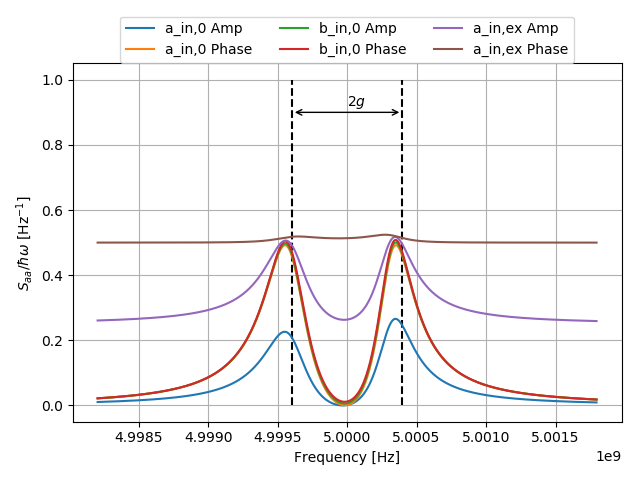

Text(5e+09,0.92,'$2g$')

In [16]:
a_outex = Output(sys_om, a_inex)

omegas = np.linspace(omega_drive + 1.*omega_m - C*2*gamma_m, omega_drive + 1.*omega_m + C*2*gamma_m, 10001)




spec = me.spectrum(omegas,me.PowerMeasurement(a_outex), components=True, plot = True)


f1 = (omega_drive + 1.*omega_m)/2/np.pi - g/2/np.pi
f2 = (omega_drive + 1.*omega_m)/2/np.pi + g/2/np.pi

plt.vlines([ f1, f2],0,1, linestyles='dashed')

plt.annotate (r'', (f1 , .9), (f2, .9), arrowprops={'arrowstyle':'<->'})
plt.annotate(r'$2g$', (f1/2 + f2/2 , 0.92))
